## MLP with TensorFlow 2
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [85]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [86]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [99]:
##################
# Training phase #
##################

E = 50                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.5               # learning rate alpha
Amin = 0.001          # minimum learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(
    x: tf.TensorSpec(shape=[None], dtype=tf.float64),
    y: tf.TensorSpec(shape=[None], dtype=tf.float64),
    alpha: tf.TensorSpec(shape=[None], dtype=tf.float64)
):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    
    # h = ...  output of first layer after ReLu activation
    # h = tf.maximum(tf.matmul(x, w1) + b1, 0)
    h = tf.nn.relu(tf.matmul(x, w1) + b1)
    
    # y_pred = ... output of second layer after sigmoid activation
    # y_pred = 1 / (1 + tf.exp(-1 * (tf.matmul(h, w2) + b2, 0)))
    y_pred = tf.sigmoid(tf.matmul(h, w2) + b2)
    
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    diff = y_pred -y
    loss = tf.reduce_mean(tf.pow(diff, 2))
    
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(loss, [w1, b1, w2, b2])
    
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variables w1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, 10), stddev = 0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[10], dtype='float64'))

# Run the computational graph
J = [] # to store the evolution of loss J for each epoch
learning_rate = np.linspace(A, Amin, E)
start_time = time.time()
for epoch in range(E):
    J_epoch = 0.0
    for batch_nr in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        batch_start = batch_nr * B
        batch_end = (batch_nr + 1) * B
        x_train_batch, y_train_batch = next_batch(B, x_train[batch_start:batch_end], y_train[batch_start:batch_end])
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch, y_train_batch, learning_rate[epoch])
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {:.4f}".format(epoch, J_epoch))
print("Training took {:.2f}s".format(time.time()-start_time))

epoch = 0, loss = 21.2440
epoch = 1, loss = 10.8721
epoch = 2, loss = 9.0625
epoch = 3, loss = 8.1215
epoch = 4, loss = 7.4911
epoch = 5, loss = 7.0188
epoch = 6, loss = 6.6422
epoch = 7, loss = 6.3305
epoch = 8, loss = 6.0654
epoch = 9, loss = 5.8362
epoch = 10, loss = 5.6349
epoch = 11, loss = 5.4565
epoch = 12, loss = 5.2969
epoch = 13, loss = 5.1523
epoch = 14, loss = 5.0210
epoch = 15, loss = 4.9014
epoch = 16, loss = 4.7920
epoch = 17, loss = 4.6913
epoch = 18, loss = 4.5985
epoch = 19, loss = 4.5127
epoch = 20, loss = 4.4333
epoch = 21, loss = 4.3598
epoch = 22, loss = 4.2916
epoch = 23, loss = 4.2280
epoch = 24, loss = 4.1690
epoch = 25, loss = 4.1140
epoch = 26, loss = 4.0627
epoch = 27, loss = 4.0150
epoch = 28, loss = 3.9705
epoch = 29, loss = 3.9292
epoch = 30, loss = 3.8908
epoch = 31, loss = 3.8551
epoch = 32, loss = 3.8220
epoch = 33, loss = 3.7913
epoch = 34, loss = 3.7629
epoch = 35, loss = 3.7367
epoch = 36, loss = 3.7126
epoch = 37, loss = 3.6905
epoch = 38, loss = 3

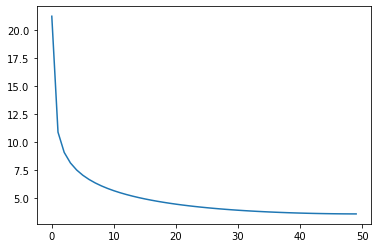

In [100]:
# Plot the evolution of the loss
plt.plot(J)

In [101]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(
    x: tf.TensorSpec(shape=[None], dtype=tf.float64),
    y: tf.TensorSpec(shape=[None], dtype=tf.float64)
):
    h = tf.nn.relu(tf.matmul(x, w1) + b1)
    y_pred = tf.sigmoid(tf.matmul(h, w2) + b2)
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [102]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  9602
# missed   :  398
accuracy   :  96.02 %
error rate :  3.98 %
